In [6]:
from pyAudioAnalysis import audioTrainTest as aT
from pyAudioAnalysis import audioBasicIO
from pyAudioAnalysis import ShortTermFeatures
import matplotlib.pyplot as plt

### Feature extraction

In [7]:
aT.extract_features_and_train(["classifierData/music","classifierData/speech"], 1.0, 1.0, aT.shortTermWindow, aT.shortTermStep, "svm", "svmSMtemp", False)
aT.file_classification("data/doremi.wav", "svmSMtemp","svm")

trainSVM_feature ERROR: No data found in any input folder!
fileClassification: input model_name not found!


(-1, -1, -1)

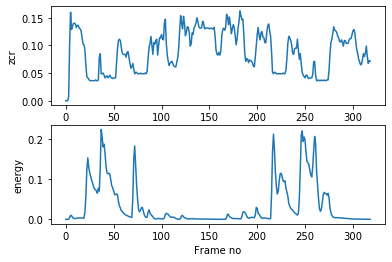

In [9]:
# Read file
[Fs, x] = audioBasicIO.read_audio_file("doremi.wav")

# Extract features
F, f_names = ShortTermFeatures.feature_extraction(x, Fs, 0.050*Fs, 0.025*Fs)
plt.subplot(2,1,1); plt.plot(F[0,:]); plt.xlabel('Frame no'); plt.ylabel(f_names[0]) 
plt.subplot(2,1,2); plt.plot(F[1,:]); plt.xlabel('Frame no'); plt.ylabel(f_names[1]); plt.show()

In [10]:
# Fs, x
audioBasicIO.read_audio_generic("doremi.wav")

(16000, array([[  0],
        [  0],
        [  0],
        ...,
        [-66],
        [-65],
        [-72]], dtype=int16))

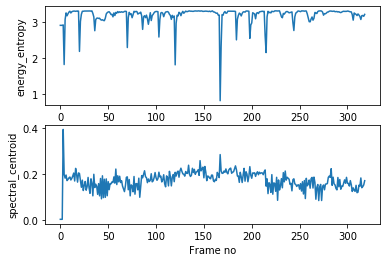

In [16]:
# There are 34 features, show the 3rd and 4th
plt.subplot(2,1,1); plt.plot(F[2,:]); plt.xlabel('Frame no'); plt.ylabel(f_names[2]) 
plt.subplot(2,1,2); plt.plot(F[3,:]); plt.xlabel('Frame no'); plt.ylabel(f_names[3]); plt.show()

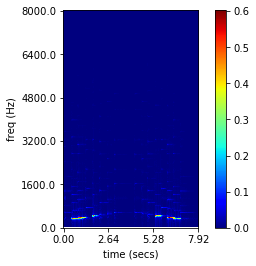

In [19]:
# Spectogram and Chromogram visualisations
from pyAudioAnalysis import audioAnalysis

audioAnalysis.fileSpectrogramWrapper("doremi.wav")

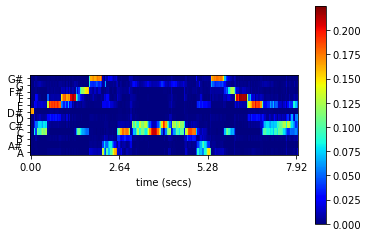

In [20]:
audioAnalysis.fileChromagramWrapper("doremi.wav")

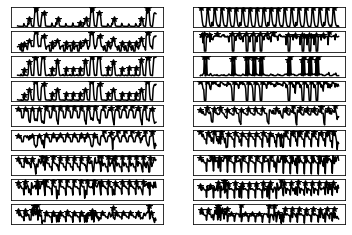

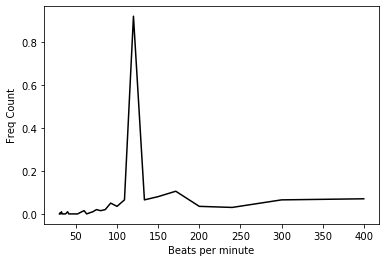

Beat: 120 bpm 
Ratio: 0.54 


In [22]:
# Estimate BPM
audioAnalysis.beatExtractionWrapper("small.wav", True)

### Classification

In [26]:
# Use pretrained classifier
aT.file_classification("doremi.wav","svm_rbf_musical_genre_6","svm")

(2.0, array([0.1871827 , 0.04932737, 0.34055256, 0.02354648, 0.22811638,
        0.17127451]), ['Blues',
  'Classical',
  'Electronic',
  'Jazz',
  'Rap',
  'Rock'])

In [27]:
aT.file_classification("fly_me_to_the_moon.wav","svm_rbf_musical_genre_6","svm")

(1.0, array([0.33910664, 0.3150943 , 0.07153498, 0.17003733, 0.06877283,
        0.03545392]), ['Blues',
  'Classical',
  'Electronic',
  'Jazz',
  'Rap',
  'Rock'])

In [108]:
aT.file_classification("fly_me.wav","svm_rbf_musical_genre_6","svm")

(1.0, array([0.28994022, 0.33958677, 0.07474354, 0.18942248, 0.07159966,
        0.03470733]), ['Blues',
  'Classical',
  'Electronic',
  'Jazz',
  'Rap',
  'Rock'])

### Youtube API

In [60]:
from pytube import YouTube

# Find and download stream with audio from Youtube
streams = YouTube('https://youtu.be/geDCgNVWJo0').streams
streams.filter(only_audio=True, abr="128kbps").first().download();
#streams.filter(only_audio=True, abr="160kbps").first().download()

In [ ]:
#ffmpeg -i video.mp4 -f mp3 -ab 192000 -vn music.mp3
#ffmpeg -i 111.mp3 -acodec pcm_s16le -ac 1 -ar 16000 out.wav

In [107]:
import ffmpeg
import os

filename = "fly_me_to_the_moon_api"
os.system("ffmpeg -i fly_me_to_the_moon_api.mp4 -f wav -ab 128000 -vn fly_me.wav")

0